In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random

In [ ]:
#Load the training and testing dataset(MNIST)
#This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.


mnist=tf.keras.datasets.mnist      #importing dataset
(x_train,y_train), (x_test, y_test)=mnist.load_data()  #splitting it into training and testing

x_train=x_train/255         #converted grey scale value from 0 to 1
x_test=x_test/255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# define the network architecture using keras
#1: This is the number of color channels in the image. In this case: 1 indicates a grayscale image (one channel).


model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28,1)), #2D image input of shape 28×28 28×28 and flattens it into a 1D array of 784 elements (28 * 28 = 784).
    keras.layers.Dense(128, activation="relu"),#is a fully connected layer with 128 neurons.The relu activation function introduces non-linearity to the model, allowing it to learn complex patterns.
    keras.layers.Dense(10, activation="softmax") #is the output layer with 10 neurons, each representing a class (for example, digits 0 through 9 in the MNIST dataset).

    #The softmax activation function is commonly used for multi-class classification problems as it converts the outputs into probabilities, where the sum of probabilities is 1.

])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# train model using SGD

#sparse_categorical_crossentropy: loss function commonly used in classification tasks where the target labels are integers representing class indices
#calculates the negative log probability of the correct class, so minimizing this loss function encourages the model to assign high probabilities to the correct class.
#directly uses integer class labels (e.g., 1 for class 1).

model.compile(optimizer="sgd",
             loss="sparse_categorical_crossentropy",      #measures dissimilarity
             metrics=['accuracy'])

history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=3) # it will go through the entire training data set 3 times.



Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7470 - loss: 1.0097 - val_accuracy: 0.9031 - val_loss: 0.3571
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9040 - loss: 0.3510 - val_accuracy: 0.9188 - val_loss: 0.2915
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9187 - loss: 0.2869 - val_accuracy: 0.9270 - val_loss: 0.2586


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9157 - loss: 0.2996
Loss=0.259
Accuracy=0.927
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predicted Value:  [1.6651256e-04 1.2191460e-05 5.6041630e-05 9.9313205e-01 8.1008613e-05
 5.6825173e-03 1.2671292e-06 1.8531212e-04 5.3424347e-04 1.4871529e-04]
3


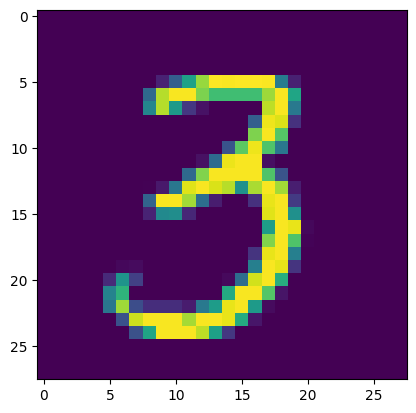

In [ ]:
# Evaluate the network
import numpy as np

test_loss, test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)


n=random.randint(0,9999)

predicted_value=model.predict(x_test)
plt.imshow(x_test[n])
plt.show

print('Predicted Value: ', predicted_value[n])
print(np.argmax(predicted_value[n]))# whatever max value is it prints its index in an array from 0-9

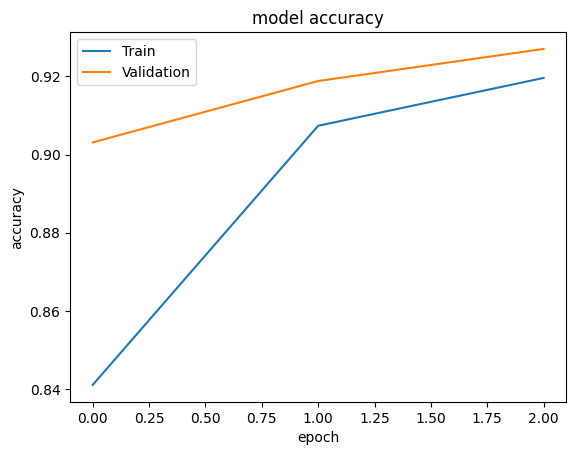

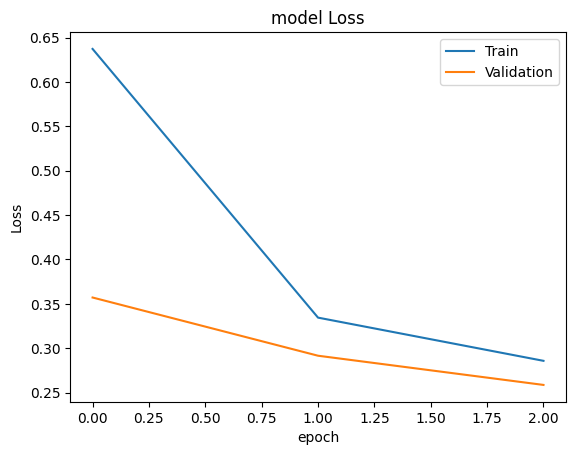

In [ ]:
#f. PLOT THE TRAINING LOSS AND ACCURACY ->

 # Plotting The Training Accuracy:-

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



# Plotting The Training Loss :-
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()